In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from backtest import Backtest

# load data

In [111]:
price = pd.read_pickle('price.pkl')
price

ticker,1332 JT,1333 JT,1334 JT,1605 JT,1721 JT,1801 JT,1802 JT,1803 JT,1808 JT,1812 JT,...,9503 JT,9531 JT,9532 JT,9602 JT,9613 JT,9681 JT,9735 JT,9766 JT,9983 JT,9984 JT
date,,,,,,,,,,,,,,,,,,,,,
2013-01-04,169.0987,NaN,147.8887,970.6780,950.5521,1232.0186,413.2189,278.1162,NaN,478.8201,...,847.8471,1727.7597,1332.1473,1367.1194,487.5256,567.3170,3719.2396,1721.7623,20584.8363,1482.3931
2013-01-07,166.3266,NaN,144.9890,960.1615,924.2187,1236.1949,411.5426,278.1162,NaN,480.4769,...,804.2336,1744.7820,1327.9713,1364.4123,475.2036,594.1617,3732.0499,1695.8510,21150.4557,1453.9312
2013-01-08,166.3266,NaN,144.9890,955.9548,938.6596,1215.3132,407.3517,277.2709,NaN,473.8496,...,795.5109,1761.8042,1340.4993,1377.0457,470.5604,585.2135,3736.3199,1627.9455,21243.1802,1472.9058
2013-01-09,165.4026,NaN,144.9890,944.3866,945.4553,1240.3712,417.4098,278.9616,NaN,482.1337,...,780.6823,1766.0598,1336.3233,1440.2130,479.3109,631.7442,3757.6703,1612.7561,21159.7281,1442.0720
2013-01-10,167.2507,NaN,144.9890,942.2833,943.7564,1252.9002,435.0114,284.8789,NaN,490.4178,...,810.3395,1757.5487,1340.4993,1516.0136,481.9896,619.2167,3791.8310,1568.9749,20918.6445,1442.0720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-15,560.0000,2718.0,NaN,826.0000,3330.0000,4240.0000,1014.0000,921.0000,1509.0,1585.0000,...,1206.0000,2375.5000,2122.0000,4275.0000,1767.0000,NaN,9726.0000,7090.0000,95390.0000,10370.0000
2021-03-16,559.0000,2713.0,NaN,828.0000,3320.0000,4255.0000,1027.0000,928.0000,1540.0,1594.0000,...,1208.5000,2407.5000,2137.0000,4410.0000,1748.0000,NaN,9694.0000,7200.0000,95190.0000,10620.0000
2021-03-17,561.0000,2732.0,NaN,808.0000,3400.0000,4220.0000,1007.0000,909.0000,1553.0,1558.0000,...,1193.0000,2450.0000,2150.0000,4335.0000,1764.0000,NaN,9680.0000,7200.0000,96000.0000,10400.0000


In [112]:
buy_price = (price).shift(-1)
sell_price = (price).shift(-1 - 1)
rtn = sell_price / buy_price - 1
rtn = rtn.fillna(0).replace(np.inf, 0)
rtn

ticker,1332 JT,1333 JT,1334 JT,1605 JT,1721 JT,1801 JT,1802 JT,1803 JT,1808 JT,1812 JT,...,9503 JT,9531 JT,9532 JT,9602 JT,9613 JT,9681 JT,9735 JT,9766 JT,9983 JT,9984 JT
date,,,,,,,,,,,,,,,,,,,,,
2013-01-04,0.000000,0.000000,0.000000,-0.004381,0.015625,-0.016892,-0.010183,-0.003039,0.000000,-0.013793,...,-0.010846,0.009756,0.009434,0.009259,-0.009771,-0.015060,0.001144,-0.040042,0.004384,0.013051
2013-01-07,-0.005555,0.000000,0.000000,-0.012101,0.007240,0.020619,0.024691,0.006098,0.000000,0.017483,...,-0.018640,0.002415,-0.003115,0.045872,0.018596,0.079511,0.005714,-0.009330,-0.003928,-0.020934
2013-01-08,0.011173,0.000000,0.000000,-0.002227,-0.001797,0.010101,0.042169,0.021212,0.000000,0.017182,...,0.037989,-0.004819,0.003125,0.052632,0.005589,-0.019830,0.009091,-0.027147,-0.011394,0.000000
2013-01-09,0.022099,0.000000,0.019999,0.041295,-0.009001,-0.006667,0.001927,0.002968,0.000000,0.000000,...,-0.007535,0.000000,0.003115,-0.000595,0.007040,0.020231,0.011261,0.033599,0.047872,-0.006579
2013-01-10,0.021622,0.000000,0.032680,0.023580,0.016349,0.003356,-0.011538,-0.017751,0.000000,-0.003378,...,0.000000,0.024213,0.021739,0.001191,0.009934,0.000000,0.013363,-0.002755,0.007614,0.004967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-15,0.003578,0.007003,0.000000,-0.024155,0.024096,-0.008226,-0.019474,-0.020474,0.008442,-0.022585,...,-0.012826,0.017653,0.006083,-0.017007,0.009153,0.000000,-0.001444,0.000000,0.008509,-0.020716
2021-03-16,0.007130,0.002928,0.000000,0.004950,0.016176,0.018957,0.020854,0.013201,0.033484,0.014763,...,0.005448,-0.003061,0.005581,0.001153,0.003401,0.000000,0.002066,-0.012500,0.009688,-0.017308
2021-03-17,0.003540,-0.005474,0.000000,-0.019704,0.000000,0.010465,0.025292,0.005429,0.036760,0.012018,...,0.015423,0.009621,0.002313,-0.004608,-0.026554,0.000000,-0.010928,-0.036568,-0.060972,-0.024560


In [113]:
volume = pd.read_pickle('volume.pkl')
volume

ticker,1332 JT,1333 JT,1334 JT,1605 JT,1721 JT,1801 JT,1802 JT,1803 JT,1808 JT,1812 JT,...,9503 JT,9531 JT,9532 JT,9602 JT,9613 JT,9681 JT,9735 JT,9766 JT,9983 JT,9984 JT
date,,,,,,,,,,,,,,,,,,,,,
2013-01-04,1464100.0,NaN,1553000.0,5312400.0,816600.0,2254000.0,6232000.0,3940000.0,NaN,5406500.0,...,11514100.0,2685000.0,1988200.0,482800.0,3148000.0,1114500.0,800500.0,1513200.0,587300.0,12023000.0
2013-01-07,1783500.0,NaN,1419000.0,3724400.0,1464400.0,3452200.0,6580000.0,5511000.0,NaN,6470000.0,...,8334600.0,2401200.0,1495200.0,458000.0,4289000.0,2862000.0,688400.0,1841700.0,980700.0,13892400.0
2013-01-08,1759800.0,NaN,869000.0,5019600.0,929800.0,3918400.0,6019000.0,5139000.0,NaN,4849000.0,...,6308100.0,2478000.0,1598800.0,635200.0,4065500.0,1620000.0,760300.0,2582000.0,616800.0,10749800.0
2013-01-09,767800.0,NaN,654000.0,6668800.0,663000.0,2350800.0,5745000.0,7800000.0,NaN,4401000.0,...,7645400.0,2897200.0,1827800.0,1122300.0,3283500.0,3021500.0,848200.0,2015400.0,633900.0,11551600.0
2013-01-10,1503100.0,NaN,661000.0,6485200.0,665000.0,2702000.0,10200000.0,5293000.0,NaN,5215000.0,...,17785700.0,3939400.0,2882200.0,1014300.0,3900000.0,1099000.0,635100.0,3119100.0,588100.0,8860200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-15,1537500.0,191100.0,NaN,10291600.0,570800.0,853900.0,2113000.0,2248100.0,2557000.0,1436200.0,...,2683400.0,1372900.0,1284500.0,271400.0,5256200.0,NaN,514900.0,547800.0,619200.0,12041200.0
2021-03-16,1594200.0,151100.0,NaN,9195200.0,532000.0,747700.0,2581500.0,2788200.0,2204800.0,1673900.0,...,3889200.0,1606800.0,1531800.0,527100.0,3727400.0,NaN,575000.0,453100.0,495500.0,11346000.0
2021-03-17,1328200.0,169400.0,NaN,10094800.0,530300.0,596900.0,3222500.0,2746000.0,1794500.0,2005300.0,...,3784600.0,1406800.0,964800.0,343900.0,3424800.0,NaN,428200.0,338500.0,421900.0,9771000.0


# gen multi factors

In [6]:
from operators import *

In [15]:
fac_dict = {}
for w in [5, 10, 20]:
    fac_dict[f'price_vol_corr_{w}'] = price.rolling(w).corr(volume)

    fac_dict[f'price_ewm_{w}'] = price.ewm(span=w).mean()
    fac_dict[f'vol_ewm_{w}'] = volume.ewm(span=w).mean()

    fac_dict[f'f_max_price_{w}'] = f_max(price, w)
    fac_dict[f'f_min_price_{w}'] = f_min(price, w)
    fac_dict[f'f_max_vol_{w}'] = f_max(volume, w)
    fac_dict[f'f_min_vol_{w}'] = f_min(volume, w)

    fac_dict[f'price_energy_{w}'] = energy(price, w)
    fac_dict[f'volume_energy_{w}'] = energy(volume, w)

    fac_dict[f'price_skew_{w}'] = skewness(price, w)
    fac_dict[f'volume_skew_{w}'] = skewness(volume, w)

    fac_dict[f'price_kurt_{w}'] = kurtosis(price, w)
    fac_dict[f'volume_kurt_{w}'] = kurtosis(volume, w)

    print("finish window size: ", w)

for s, l in zip([1, 5, 10, 20], [5, 10, 20, 50]):
    fac_dict[f'price_momentum_{s}_{l}'] = price.rolling(s).mean() - price.rolling(l).mean()

fac_dict['acc_price'] = acceleration(price)
fac_dict['acc_volume'] = acceleration(volume)
print("done")

finish window size:  5
finish window size:  10
finish window size:  20
done


In [16]:
for w in [5, 10]:
    fac_dict[f'price_ols_slope_{w}'] = regression_slope(price, w)

In [19]:
import pickle


def pickle_save(obj_to_save, save_path="obj_saved.pkl"):
    with open(save_path, 'wb') as file:
        pickle.dump(obj_to_save, file, pickle.HIGHEST_PROTOCOL)


def pickle_load(pickled_path):
    with open(pickled_path, 'rb') as file:
        obj_saved = pickle.load(file)
    return obj_saved


In [20]:
pickle_save(fac_dict, 'fac_dict.pkl')

In [73]:
fac_dict = pickle_load('fac_dict.pkl')

# Model

To simplify, use Lasso regression to combine factors.

Before that , peek performance of every single factor, and delete noise factors before going into Lasso.

## split data into train and test


In [114]:
price_all = price.copy()
price = price_all[price_all.index <= '2021-01-01']
price_out = price_all[price_all.index > '2021-01-01']

volume_all = volume.copy()
volume = volume_all[volume_all.index <= '2021-01-01']
volume_out = volume_all[volume_all.index > '2021-01-01']

rtn_all = rtn.copy()
rtn = rtn_all[rtn_all.index <= '2021-01-01']
rtn_out = rtn_all[rtn_all.index > '2021-01-01']

In [74]:
fac_dict_out = {}
fac_dict_all = fac_dict.copy()
for fn, f in fac_dict_all.items():
    fac_dict[fn] = f[f.index <= '2021-01-01']
    fac_dict_out[fn] = f[f.index > '2021-01-01']

## backtest single factors

when backtest single factors, focus on factor itself, not trade strategy.

open pos when fac > mean, buy next and sell the day next tomorrow. and pnl is net pnl, subtract from index (all market). And also, auto set reversal or trending.

In [41]:
# init backtest engine
bt = Backtest(price.T)
def bk(fac):
    rslt = bt.ret_info(fac.T)
    return rslt

In [42]:
f_rslt = []
for fn, f in fac_dict.items():
    print(fn)
    rslt = bk(f)
    print(rslt)
    f_rslt.append(rslt)

price_vol_corr_5
{'TurnOver': 0.7232456612222696, 'RetNC': 0.021532360271595143, 'SharpeNC': 0.6212659912711074, 'DDNC': 0.0835352101442914}
price_ewm_5
{'TurnOver': 0.009621187038758678, 'RetNC': 0.008529650389319923, 'SharpeNC': 0.1009261138997142, 'DDNC': 0.3277198233449576}
vol_ewm_5
{'TurnOver': 0.12364852643697757, 'RetNC': 0.013638585417554645, 'SharpeNC': 0.12279158529100707, 'DDNC': 0.30886264857629814}
f_max_price_5
{'TurnOver': 0.40321367555355486, 'RetNC': 0.009835154811495933, 'SharpeNC': 0.1861041229818505, 'DDNC': 0.12414711864440545}
f_min_price_5
{'TurnOver': 0.4195035654570989, 'RetNC': 0.01131326061881667, 'SharpeNC': 0.24523320716508046, 'DDNC': 0.08996899451485986}
f_max_vol_5
{'TurnOver': 0.5818839841971089, 'RetNC': -0.009816552161735005, 'SharpeNC': -0.34534647488453185, 'DDNC': 0.12916396091765367}
f_min_vol_5
{'TurnOver': 0.5491008486875351, 'RetNC': 0.008153616718335206, 'SharpeNC': 0.31188008117141824, 'DDNC': 0.11444389816875293}
price_energy_5
{'TurnOver':

In [43]:
rslt_df = pd.DataFrame(f_rslt, index=fac_dict.keys())
rslt_df

,TurnOver,RetNC,SharpeNC,DDNC
price_vol_corr_5,0.723246,0.021532,0.621266,0.083535
price_ewm_5,0.009621,0.008530,0.100926,0.327720
vol_ewm_5,0.123649,0.013639,0.122792,0.308863
f_max_price_5,0.403214,0.009835,0.186104,0.124147
f_min_price_5,0.419504,0.011313,0.245233,0.089969
f_max_vol_5,0.581884,-0.009817,-0.345346,0.129164
f_min_vol_5,0.549101,0.008154,0.311880,0.114444
price_energy_5,0.009932,0.044755,0.250106,0.521512
volume_energy_5,0.138578,0.035483,0.156218,0.554677
price_skew_5,1.070088,0.020791,0.525963,0.114728


In [46]:
rslt_df.sort_values('SharpeNC', ascending=False)

,TurnOver,RetNC,SharpeNC,DDNC
volume_skew_5,0.854547,0.020864,0.761066,0.057124
price_kurt_5,1.237953,0.026578,0.688080,0.098714
price_vol_corr_5,0.723246,0.021532,0.621266,0.083535
volume_kurt_5,0.941867,0.015479,0.567630,0.059391
price_skew_5,1.070088,0.020791,0.525963,0.114728
volume_skew_10,0.508175,0.013916,0.397368,0.091333
price_momentum_20_50,0.071259,0.029276,0.375621,0.218160
f_min_vol_5,0.549101,0.008154,0.311880,0.114444
f_min_price_20,0.109580,0.016091,0.295695,0.137979
f_min_vol_10,0.329405,0.008715,0.283820,0.051241


In [49]:
noise_factor_lst = rslt_df[rslt_df.RetNC < 0].index.to_list()

In [51]:
# delete factor f_max_price_10, because the result is not good
for n in noise_factor_lst:
    del fac_dict[n]
    del fac_dict_out[n]

## factor combination

Lasso Regression

factors matrix -> return (buy tomorrow, sell the day next tomorrow)

In [52]:
# lasso
# factors -> return

In [85]:
factors = pd.DataFrame()
for fn, fac in fac_dict.items():
    factors[fn] = fac.fillna(0).stack().reset_index(drop=True)

In [86]:
rtn_ = rtn.stack().reset_index(drop=True)
rtn_

0         0.000000
1         0.000000
2         0.000000
3        -0.004381
4         0.015625
            ...   
484339    0.000000
484340   -0.010236
484341    0.012069
484342   -0.020648
484343    0.001499
Length: 484344, dtype: float64

## regression

In [87]:
X, y = factors, rtn_

In [88]:
X = X.fillna(0).replace([np.nan, np.inf, -np.inf], 0)
y = y.fillna(0).replace([np.nan, np.inf, -np.inf], 0)

In [89]:
X.shape, y.shape

((484344, 47), (484344,))

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LassoCV, LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ("scaler", StandardScaler(with_mean=True, with_std=True)),
    ("model", Lasso(alpha=0.0001))
])

pipe.fit(X, y)
coef = pipe.named_steps['model'].coef_
yhat = pipe.predict(X)

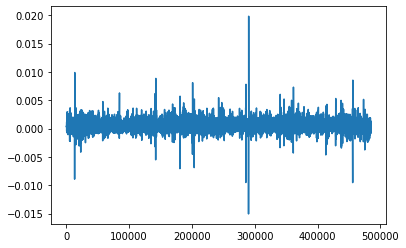

In [91]:
plt.plot(yhat)

In [92]:
dict(zip(factors.columns, coef))

{'price_vol_corr_5': 0.0,
 'price_ewm_5': -0.0,
 'vol_ewm_5': 0.0,
 'f_max_price_5': 0.0,
 'f_min_price_5': 0.0,
 'f_max_vol_5': 0.00012291365151616293,
 'f_min_vol_5': 0.0,
 'price_energy_5': 0.0,
 'volume_energy_5': 0.0,
 'price_skew_5': -0.0,
 'volume_skew_5': 0.0,
 'price_kurt_5': 0.0,
 'volume_kurt_5': 6.273636653933819e-05,
 'price_vol_corr_10': 0.0,
 'price_ewm_10': -0.0,
 'vol_ewm_10': 0.0,
 'f_max_price_10': -0.0,
 'f_min_price_10': 0.0,
 'f_max_vol_10': 0.0,
 'f_min_vol_10': 0.0,
 'price_energy_10': 0.0,
 'volume_energy_10': -0.0,
 'price_skew_10': -8.174307753697502e-05,
 'volume_skew_10': 0.0,
 'price_kurt_10': -0.0,
 'volume_kurt_10': 0.0,
 'price_vol_corr_20': -0.0,
 'price_ewm_20': -0.0,
 'vol_ewm_20': 0.0,
 'f_max_price_20': -0.0,
 'f_min_price_20': 7.737595273274747e-05,
 'f_max_vol_20': -8.898780300238366e-05,
 'f_min_vol_20': 0.0,
 'price_energy_20': 0.0,
 'volume_energy_20': 0.0,
 'price_skew_20': -0.0,
 'volume_skew_20': 0.0,
 'price_kurt_20': 3.908475101031568e-05

In [93]:
np.corrcoef(yhat, y)

array([[1.        , 0.03223011],
       [0.03223011, 1.        ]])

## evaluation

In [95]:
signal = pd.DataFrame(yhat.reshape(rtn.shape), index=rtn.index, columns=rtn.columns)

In [96]:
signal

ticker,1332 JT,1333 JT,1334 JT,1605 JT,1721 JT,1801 JT,1802 JT,1803 JT,1808 JT,1812 JT,...,9503 JT,9531 JT,9532 JT,9602 JT,9613 JT,9681 JT,9735 JT,9766 JT,9983 JT,9984 JT
date,,,,,,,,,,,,,,,,,,,,,
2013-01-04,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,...,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357
2013-01-07,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,...,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357
2013-01-08,0.000576,0.000357,0.000622,0.000354,0.001002,0.000168,0.000302,0.000377,0.000357,0.000209,...,0.000826,0.000339,0.000465,0.000435,0.000587,-0.000129,0.000300,0.000043,0.000213,0.000779
2013-01-09,0.000358,0.000357,0.000340,0.000269,0.000249,0.000859,0.000759,0.000392,0.000357,0.000702,...,0.000211,0.000254,0.000201,0.000738,0.000704,0.001303,0.000408,0.000790,0.000211,-0.000076
2013-01-10,0.000545,0.000357,0.000241,0.000594,0.000299,0.000111,0.000690,0.000709,0.000357,0.000360,...,0.001029,0.000439,0.000555,0.000555,0.000180,-0.000711,0.000398,0.000130,0.000422,0.000663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,0.000770,0.000620,0.000357,0.001459,0.000263,0.000427,0.000827,0.000785,0.000918,0.000456,...,0.000476,0.000618,0.000544,0.000848,0.000498,0.000357,0.000509,-0.000031,-0.000784,0.000266
2020-12-25,0.000838,0.000274,0.000357,0.000411,0.000417,0.000382,0.000582,0.000273,0.000909,0.000584,...,0.000387,0.000341,0.000286,0.000557,0.000700,0.000357,0.000231,-0.000075,-0.000978,-0.000075
2020-12-28,0.000398,0.000338,0.000357,0.000399,0.000220,0.000228,0.000054,0.000191,0.000274,0.000414,...,0.000489,0.000709,0.000376,0.000445,0.000503,0.000357,0.000166,0.000309,-0.000879,0.000529


In [97]:
bk(signal)

{'TurnOver': 1.4083112804096396,
 'RetNC': 0.027448696175471417,
 'SharpeNC': 0.49389022247225095,
 'DDNC': 0.0978680393461792}

it seems that signal is not good as well even in sample. Might be overfitting.

# outsample strategy

To test our signal outsample.
Set strategy: buy when signal > 90%, buy tomorrow and sell the day next tomorrow, no fee.


## gen signal outsample

In [77]:
factors_out = pd.DataFrame()
for fn, fac in fac_dict_out.items():
    factors_out[fn] = fac.fillna(0).stack().reset_index(drop=True)

factors_out

,price_vol_corr_5,price_ewm_5,vol_ewm_5,f_max_price_5,f_min_price_5,f_max_vol_5,f_min_vol_5,price_energy_5,volume_energy_5,price_skew_5,...,price_kurt_20,volume_kurt_20,price_momentum_1_5,price_momentum_5_10,price_momentum_10_20,price_momentum_20_50,acc_price,acc_volume,price_ols_slope_5,price_ols_slope_10
0,0.494400,423.232909,1.745446e+06,4.0,1.0,4.0,1.0,1.794460e+05,2.887861e+12,0.379092,...,-0.860443,1.070034,-2.60000,0.70000,-0.750000,1.790000,-0.007064,0.094646,0.20000,-0.054545
1,0.817495,2207.560280,1.333986e+05,4.0,1.0,3.0,2.0,4.887011e+06,1.873782e+10,0.458140,...,-0.548127,3.563451,-8.60000,11.10000,10.600000,-30.900000,-0.000952,-0.037806,4.00000,2.418182
2,0.000000,168.682669,7.239028e+06,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
3,0.094033,554.718394,6.453023e+06,3.0,2.0,2.0,3.0,3.118296e+05,4.557991e+13,-1.079283,...,1.317177,-0.218359,-11.37914,2.50777,-4.522550,13.137422,-0.005511,0.820845,-4.27912,-0.411458
4,0.756193,3174.147257,3.385496e+05,4.0,1.0,3.0,2.0,9.988740e+06,1.128690e+11,-0.640503,...,-0.656440,-0.791881,55.00000,31.50000,1.750000,91.130000,-0.000010,-0.217486,34.50000,13.424242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12891,0.000000,1026.675915,4.004445e+06,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
12892,-0.839708,9626.858298,6.330920e+05,4.0,1.0,1.0,4.0,9.368119e+07,3.375603e+11,-1.614213,...,-1.531403,3.805160,-84.80000,147.50000,60.950000,-123.050000,-0.012994,0.555201,-25.80000,51.400000
12893,-0.978355,7054.141253,6.149045e+05,1.0,4.0,1.0,4.0,5.028454e+07,3.258183e+11,-1.577617,...,-0.435758,1.702696,-240.00000,-22.00000,21.500000,218.500000,-0.024068,0.252575,-57.00000,-0.606061
12894,-0.901083,94297.159883,9.349063e+05,4.0,1.0,2.0,3.0,9.011291e+09,7.294502e+11,-1.731178,...,-1.483813,1.442101,-3886.00000,495.00000,-4948.987705,3746.190303,-0.070659,0.666783,-700.00000,85.151515


In [99]:
yhat_out = pipe.predict(factors_out)

In [102]:
yhat_out

array([ 0.00066732,  0.00064886,  0.00035652, ...,  0.00011527,
       -0.00136838,  0.00013781])

In [117]:
signal_out = pd.DataFrame(yhat_out.reshape(rtn_out.shape), index=rtn_out.index, columns=rtn_out.columns)
signal_out

ticker,1332 JT,1333 JT,1334 JT,1605 JT,1721 JT,1801 JT,1802 JT,1803 JT,1808 JT,1812 JT,...,9503 JT,9531 JT,9532 JT,9602 JT,9613 JT,9681 JT,9735 JT,9766 JT,9983 JT,9984 JT
date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,0.000667,0.000649,0.000357,0.000452,0.000496,0.000905,0.000890,0.000212,0.001028,0.000867,...,0.000837,0.000549,0.000598,0.000979,0.000560,0.000357,0.000571,0.000573,-0.000753,0.000131
2021-01-05,0.000756,0.000580,0.000357,0.000980,0.000117,0.000723,0.000830,0.000393,0.000952,0.000964,...,0.000388,0.000726,0.000597,0.000817,0.000315,0.000357,0.000542,0.000822,-0.000428,0.000238
2021-01-06,0.000820,0.000787,0.000357,0.000999,0.000630,0.001289,0.001391,0.001190,0.000799,0.000892,...,0.000953,0.001149,0.000966,0.000850,0.000585,0.000357,0.000770,0.000714,-0.000516,0.000377
2021-01-07,0.000284,0.000293,0.000357,0.000220,0.000466,0.000790,0.000946,0.000513,0.001102,0.000874,...,0.000514,0.000877,0.000569,0.000690,0.000775,0.000357,0.000643,0.000591,0.000210,-0.000029
2021-01-08,0.000689,0.000697,0.000357,0.000291,0.000575,0.000831,0.000914,0.000670,0.000837,0.000717,...,0.000420,0.000908,0.000692,0.000999,0.000470,0.000357,0.000582,0.001168,-0.000047,0.000577
2021-01-12,0.000436,0.000634,0.000357,0.000512,0.000196,0.000810,0.000461,0.000586,0.000514,0.000756,...,0.000990,0.000991,0.000874,0.000705,0.000306,0.000357,0.000502,0.000265,-0.000787,0.000608
2021-01-13,0.000253,0.000464,0.000357,0.000833,0.000434,0.000813,0.000841,0.000628,0.000891,0.000630,...,-0.000192,0.000251,-0.000044,-0.000068,0.000300,0.000357,0.000520,0.000848,-0.000198,0.000511
2021-01-14,0.000392,0.000409,0.000357,-0.000044,0.000766,0.000951,0.000922,0.000993,0.000566,0.000673,...,0.001038,0.000819,0.001025,0.002176,0.000629,0.000357,0.001053,0.000269,-0.000498,0.000379
2021-01-15,0.000317,0.000531,0.000357,0.000767,0.000461,0.000498,0.000250,0.000270,0.000516,0.000149,...,0.000306,0.000403,0.000512,0.000426,0.000303,0.000357,-0.000024,0.000474,-0.000911,-0.000015


In [119]:
condition_out = (signal_out.T > signal_out.T.quantile(0.95)).T

                              0
annual                  1.70654
maxdd                -0.0549652
startdate   2021-02-15 00:00:00
enddate     2021-02-24 00:00:00
winratio                   0.68
plratio                 1.08066
volatility             0.197419
sharpe                  8.64429


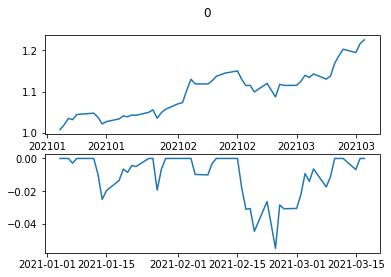

In [120]:
def backtest_v2(price, condition):
    buy_price = (price).shift(-1)
    sell_price = (price).shift(-1 - 1)
    return_ = (sell_price / buy_price - 1) * condition
    return_.index = pd.to_datetime(return_.index)
    return_ = (return_.where(return_ != 0).mean(axis=1)).dropna()

    from summarybacktest import SummaryBacktest
    s = SummaryBacktest(return_)
    s.show_summary()


return_ = backtest_v2(price_out, condition_out)

                              0
annual                  1.61377
maxdd                -0.0366734
startdate   2021-02-15 00:00:00
enddate     2021-02-24 00:00:00
winratio                   0.68
plratio                 1.16886
volatility             0.177908
sharpe                  9.07078


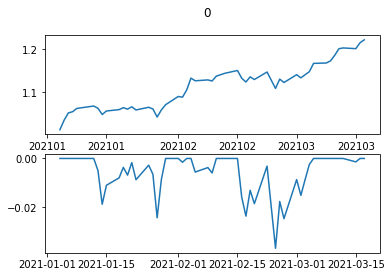

In [127]:
condition_bench = condition_out.replace(False, True)
backtest_v2(price_out, condition_bench)

bravo!
outsample return is 1.70654, and benchmark return is 1.61377.
We beat the benchmark over 9.3%.